In this notebook, we'll be playing around with creating a SAG animation

In [278]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib notebook

In [283]:
class SagShellLifter():
    height = 0.1
    width = 0.04
    arm_radius = 0.95
    
    def __init__(self,current_angle):
        self.current_angle = current_angle
        self.current_x = self.arm_radius * np.cos(self.current_angle)
        self.current_y = self.arm_radius * np.sin(self.current_angle)
    
    def update_position(self,del_theta):
        self.current_angle += del_theta
        self.current_x = self.arm_radius * np.cos(self.current_angle)
        self.current_y = self.arm_radius * np.sin(self.current_angle)
        
class SagShell():
    def __init__(self,list_of_pins):
        self.pins = list_of_pins
        self.shell_radius = 1.1


    def update_positions(self,del_theta):
        for p in self.pins:
            p.update_position(del_theta)
            
    def initialise_axis(self,ax):
        # Set the axis limits for the circle plot
        ax.set_xlim(-1.1, 1.0 + 0.1)
        ax.set_ylim(-1.1, 1.0 + 0.1)

        # Set the axis equal aspect ratio for the circle plot
        ax.set_aspect('equal')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        #self.draw_shell(ax)

    def draw_shell(self,ax):
        # Clear the axis
        ax.cla()
        outer_shell = plt.Circle((0, 0), self.shell_radius, color='black', alpha=0.5)
        ax.add_patch(outer_shell)
        inner_shell = plt.Circle((0, 0), self.shell_radius-0.1, color='white', alpha=1)
        ax.add_patch(inner_shell)
        for pin in self.pins:
            lifter = Rectangle((pin.current_x, pin.current_y), 
                               pin.height,pin.width, 
                               pin.current_angle*180/np.pi,
                               color='grey', alpha=1)
            ax.add_patch(lifter)
            
        ax.set_xlim(-1.1, 1.0 + 0.1)
        ax.set_ylim(-1.1, 1.0 + 0.1)
        ax1.set_aspect('equal')
        ax1.get_xaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])

    
class AreaPlot():
    colors = ['b', 'g', 'r', 'c', 'm']
    
    def __init__(self,time,list_of_timeline,labels,name,time_range = 20):
        self.time = time
        self.timelines = list_of_timeline
        self.name = name
        self.time_range = time_range
        self.labels = labels
        
    def initialise(self,ax):
        ax.set_ylim(0, max([sum(p) for p in tuple(zip(*self.timelines))]))
        self.stacked_plot = ax.stackplot([], [])
        ax.set_title(self.name,fontdict  = {'fontsize':8})
        
    def update(self,ax,index):
        ax.collections.clear()
        data = [p[(index-self.time_range):(index+self.time_range)] for p in self.timelines]
        ax.stackplot(self.time[(index-self.time_range):(index+self.time_range)],data,labels = self.labels, colors = self.colors)
        ax.set_xlim(self.time[index-20], self.time[index+20])
        ax.legend(loc='upper left')

class TimeLine():
    def __init__(self,data,time,name,time_range = 20):
        self.data = data
        self.time = time
        self.name = name
        self.time_range = time_range
    
    def initialise_timeline(self,ax):
        ax.set_ylim(0, max(self.data))
        ax.set_title(self.name,fontdict  = {'fontsize':8})
        self.dataline, = ax.plot([], [], lw=2)
        self.current_tracker, = ax.plot([], [], lw=2,color = 'orange')
        self.dot = ax.scatter([], [],c = 'orange')
    
    def update_timeline(self,ax,index):
        ydata = self.data[(index-self.time_range):(index+self.time_range)] #np.append(line.get_xdata(), num)
        xdata = self.time[(index-self.time_range):(index+self.time_range)]  #np.append(line.get_ydata(), omega) 
        self.dataline.set_data(xdata, ydata)
        self.current_tracker.set_data([self.time[index],self.time[index]], [0,1])
        self.dot.set_offsets(np.array([self.time[index],self.data[index]]))
        ax.set_xlim(self.time[index-20], self.time[index+20])



<IPython.core.display.Javascript object>


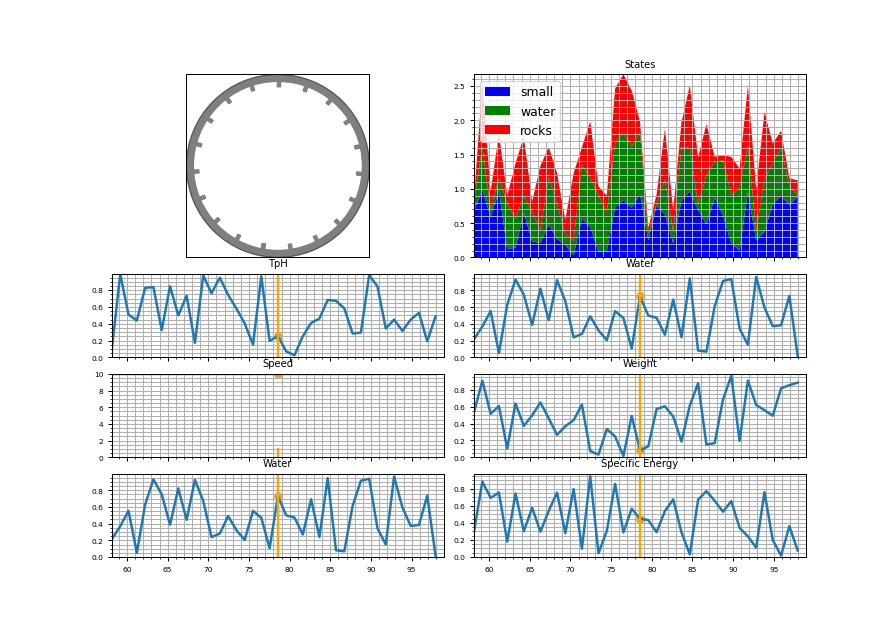

In [284]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
shape = (5,4)

ax1 = plt.subplot2grid(shape=shape, loc=(0, 0), colspan=2,rowspan=2)
ax1b = plt.subplot2grid(shape=shape, loc=(0, 2), colspan=2,rowspan=2)

ax2 = plt.subplot2grid(shape=shape, loc=(2, 0), colspan=2)
ax3 = plt.subplot2grid(shape=shape, loc=(3, 0), colspan=2)
ax4 = plt.subplot2grid(shape=shape, loc=(4, 0), colspan=2)

ax5 = plt.subplot2grid(shape=shape, loc=(2, 2), colspan=2)
ax6 = plt.subplot2grid(shape=shape, loc=(3, 2), colspan=2)
ax7 = plt.subplot2grid(shape=shape, loc=(4, 2), colspan=2)

lower_ax = [ax2,ax3,ax4,ax5,ax6,ax7,ax1b]

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax1b.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax5.set_xticklabels([])
ax6.set_xticklabels([])

for a in lower_ax:
    a.tick_params(axis='both', which='major', labelsize=6)
    a.minorticks_on()
    a.tick_params(axis='x', which='minor', labelsize=5)
    a.grid(True, which='both')

    
#######################################
# Set the number of frames
n_frames = 100
max_vel = 1 #rpm

# Set the angular velocity data (in radians per frame)
time = np.linspace(0,101,n_frames)
speed_data = np.array([10]*n_frames)#np.linspace(0,max_vel/2/np.pi,n_frames)
u_in = np.random.uniform(0,1,n_frames)
power = np.random.uniform(0,1,n_frames)
weight = np.random.uniform(0,1,n_frames)
water = np.random.uniform(0,1,n_frames)
specific_energy = np.random.uniform(0,1,n_frames)
xs = np.random.uniform(0,1,n_frames)
xr = np.random.uniform(0,1,n_frames)
xw = np.random.uniform(0,1,n_frames)

# Setting up the ojects
pins = [SagShellLifter(theta) for theta in np.linspace(0,2*np.pi,20)]
sag_shell = SagShell(pins)
speed_line = TimeLine(speed_data,time,"Speed")
u_line = TimeLine(u_in,time,"TpH")
water_line = TimeLine(power,time,"Water")
weight_line = TimeLine(weight,time,"Weight")
power_line = TimeLine(power,time,"Water")
specific_energy_line = TimeLine(specific_energy,time,"Specific Energy")
Area_plot = AreaPlot(time,[xs,xw,xr],["small","water","rocks"],"States")

# Initialize the circle patch
sag_shell.initialise_axis(ax1)
speed_line.initialise_timeline(ax3)
u_line.initialise_timeline(ax2)
water_line.initialise_timeline(ax4)
power_line.initialise_timeline(ax5)
weight_line.initialise_timeline(ax6)
specific_energy_line.initialise_timeline(ax7)
Area_plot.initialise(ax1b)
    
def update(num):
    # Get the current angular velocity from the data
    omega = speed_data[num]

    # Update the circle patch position
    sag_shell.update_positions(omega)

    # Add the circle patch
    sag_shell.draw_shell(ax1)

    # Update the lines
    speed_line.update_timeline(ax3,num)
    u_line.update_timeline(ax2,num)
    water_line.update_timeline(ax4,num)
    power_line.update_timeline(ax5,num)
    weight_line.update_timeline(ax6,num)
    specific_energy_line.update_timeline(ax7,num)
    
    # Area plot
    Area_plot.update(ax1b,num)



    
# Set up the frames
ani = animation.FuncAnimation(fig, update, frames=range(22,n_frames-22), repeat=False,interval=1)

# Save the animation as a GIF
#ani.save('rotating_circle.gif', writer='pillow', fps=100)

#update(2)
# Show the plot
plt.show()